#### Carga de las dependencias necesarias y carga del dataset

In [249]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [250]:
cars = pd.read_csv('CO2 Emissions_Canada.csv')


### Sobre el dataset
- Este dataset contiene datos de vehículos en Canadá y de su consumo de combustible y emisiones de CO2

### Preprocesado de los datos
Un primer vistazo a los datos

In [251]:
cars.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Cambio el nombre de las columnas

In [252]:
cars.rename(columns = {'Engine Size(L)':'tamaño_motor','Fuel Type':'tipo_combustible','Make':'fabricante',
'Model':'modelo','Cylinders':'cilindros','Vehicle Class':'tipo_vehículo',
'Transmission':'transmision','Fuel Consumption City (L/100 km)':'consumo_ciudad',
'Fuel Consumption Hwy (L/100 km)':'consumo_carretera','Fuel Consumption Comb (L/100 km)':'consumo_combinado',
'Fuel Consumption Comb (mpg)':'mpg','CO2 Emissions(g/km)':'co2'}, inplace = True)

Pongo en minúsculas los campos fabricante, modelo y tipo de vehículo 

In [253]:
cars["fabricante"] = cars["fabricante"].str.lower()
cars["modelo"] = cars["modelo"].str.lower()
cars["tipo_vehículo"] = cars["tipo_vehículo"].str.lower()

Creo una nueva columna donde agrupo las marcas de coches por categoría de precio en tres categorías

In [254]:
asequibles = [ 'chevrolet', 'gmc', 'nissan', 'jeep', 'kia', 'fiat', 'hyundai',  'honda', 'mazda']
rango_medio = ['ford','toyota', 'mini', 'buick', 'chrysler','volkswagen', 'dodge' , 'acura', 'genesis', 'alfa romeo', 'smart','mitsubishi','ram','volvo','audi']
premium = ['bmw', 'mercedes-benz',  'porsche', 'lexus', 'subaru', 'jaguar', 'infiniti', 'lincoln', 'land rover', 'cadillac', 'maserati', 'rolls-royce', 'aston martin', 'lamborghini', 'bentley', 'scion','srt','bugatti']

def cat_precio(brand):
    if brand in asequibles:
        return 'asequibles'
    elif brand in rango_medio:
        return 'rango_medio'
    elif brand in premium:
        return 'premium'
    else:
        return 'desconocido'
    
cars['cat_precio'] = cars['fabricante'].apply(cat_precio)

Los valores de la columna trasmisión contienen el tipo de trasmisión y el número de marchas por lo que las separo en dos columnas 

In [255]:
import re

cars["marchas"] = cars["transmision"].copy()

cars["marchas"] = cars["marchas"].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else None )

cars["transmision"] = cars["transmision"].apply(lambda x: re.findall("[A-Za-z]+", str(x))[0] if re.findall("[A-Za-z]+", str(x)) else None)

Cambio los valores de las columnas trasmisión y tipo de combustible para que se entiendan mejor

In [256]:


# Define el diccionario de mapeo de valores
mapa_valores = {
    'A': 'automático',
    'AM': 'automático manual',
    'AS':'automático con selector de marcha',
    'AV': 'automático variable',
    'M': 'manual'    
}

# Reemplaza los valores en la columna fuel_type
cars['transmision'] = cars['transmision'].replace(mapa_valores)


In [257]:
# Define el diccionario de mapeo de valores
mapa_valores = {
    'X': 'gasolina',
    'Z': 'gasolina premium',
    'D': 'diesel',
    'E': 'ethanol',
    'N': 'Gas Natural'
}

# Reemplaza los valores en la columna fuel_type
cars['tipo_combustible'] = cars['tipo_combustible'].replace(mapa_valores)



Vemos como está ahora el dataset

In [258]:
cars.head()

,fabricante,modelo,tipo_vehículo,tamaño_motor,cilindros,transmision,tipo_combustible,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2,cat_precio,marchas
0,acura,ilx,compact,2.0,4,automático con selector de marcha,gasolina premium,9.9,6.7,8.5,33,196,rango_medio,5
1,acura,ilx,compact,2.4,4,manual,gasolina premium,11.2,7.7,9.6,29,221,rango_medio,6
2,acura,ilx hybrid,compact,1.5,4,automático variable,gasolina premium,6.0,5.8,5.9,48,136,rango_medio,7
3,acura,mdx 4wd,suv - small,3.5,6,automático con selector de marcha,gasolina premium,12.7,9.1,11.1,25,255,rango_medio,6
4,acura,rdx awd,suv - small,3.5,6,automático con selector de marcha,gasolina premium,12.1,8.7,10.6,27,244,rango_medio,6


Tamaño del dataset

In [259]:
cars.shape

(7385, 14)

Lista de columnas

In [260]:
columns = list(cars.columns)
columns

['fabricante',
 'modelo',
 'tipo_vehículo',
 'tamaño_motor',
 'cilindros',
 'transmision',
 'tipo_combustible',
 'consumo_ciudad',
 'consumo_carretera',
 'consumo_combinado',
 'mpg',
 'co2',
 'cat_precio',
 'marchas']

Tipos de datos

In [261]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fabricante         7385 non-null   object 
 1   modelo             7385 non-null   object 
 2   tipo_vehículo      7385 non-null   object 
 3   tamaño_motor       7385 non-null   float64
 4   cilindros          7385 non-null   int64  
 5   transmision        7385 non-null   object 
 6   tipo_combustible   7385 non-null   object 
 7   consumo_ciudad     7385 non-null   float64
 8   consumo_carretera  7385 non-null   float64
 9   consumo_combinado  7385 non-null   float64
 10  mpg                7385 non-null   int64  
 11  co2                7385 non-null   int64  
 12  cat_precio         7385 non-null   object 
 13  marchas            7090 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 807.9+ KB


**Insights**
- Vemos que en la columna de marchas hay nulos

Valores diferentes por columna

In [262]:
cars.nunique(axis=0)

fabricante             42
modelo               1596
tipo_vehículo          16
tamaño_motor           51
cilindros               8
transmision             5
tipo_combustible        5
consumo_ciudad        211
consumo_carretera     143
consumo_combinado     181
mpg                    54
co2                   331
cat_precio              3
marchas                 7
dtype: int64

**Insights**
- La columna modelo que es categórica tiene muchos valores diferentes por lo que no es muy representativa para hacer un análisis del dataset con ella, por lo que la borro.
- La columna cilindros pese a ser númerica tiene pocos valores distintos por lo que la agrupo con las columnas categóricas

Creo dos listas diferentes una para las columnass categóricas y otra para las numéricas

In [263]:
cats = list(cars.select_dtypes(include=['object']).columns)
nums = list(cars.select_dtypes(exclude=['object']).columns)
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['fabricante', 'modelo', 'tipo_vehículo', 'transmision', 'tipo_combustible', 'cat_precio', 'marchas']
Variables numéricas: ['tamaño_motor', 'cilindros', 'consumo_ciudad', 'consumo_carretera', 'consumo_combinado', 'mpg', 'co2']


Meto la columna cilindros en la lista de categóricas

In [264]:
cats.extend(['cilindros'])
nums.remove('cilindros')

print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['fabricante', 'modelo', 'tipo_vehículo', 'transmision', 'tipo_combustible', 'cat_precio', 'marchas', 'cilindros']
Variables numéricas: ['tamaño_motor', 'consumo_ciudad', 'consumo_carretera', 'consumo_combinado', 'mpg', 'co2']


Elimino la columna modelo del dataset y de la lista de categóricas

In [265]:
cars = cars.drop(columns=['modelo'])
cats.remove('modelo')


##### Análisis de nulos y duplicados

Vemos las filas que hay nulas

In [266]:
cars[cars.isnull().any(axis=1)]

,fabricante,tipo_vehículo,tamaño_motor,cilindros,transmision,tipo_combustible,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2,cat_precio,marchas
259,chevrolet,subcompact,1.2,4,automático variable,gasolina,7.7,6.0,6.9,41,159,asequibles,None
342,ford,full-size,2.0,4,automático variable,gasolina,5.6,6.4,6.0,47,138,rango_medio,None
415,ford,mid-size,2.0,4,automático variable,gasolina,5.3,5.7,5.5,51,126,rango_medio,None
481,honda,mid-size,2.4,4,automático variable,gasolina,9.0,6.6,7.9,36,182,asequibles,None
487,honda,mid-size,2.0,4,automático variable,gasolina,4.7,4.9,4.8,59,110,asequibles,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7340,toyota,suv - standard,2.5,4,automático variable,gasolina,6.6,6.8,6.7,42,156,rango_medio,None
7341,toyota,mid-size,1.8,4,automático variable,gasolina,4.4,4.7,4.5,63,106,rango_medio,None
7342,toyota,mid-size,1.8,4,automático variable,gasolina,4.5,4.9,4.7,60,109,rango_medio,None
7343,toyota,compact,1.5,4,automático variable,gasolina,4.9,5.5,5.1,55,120,rango_medio,None


Vemos el porcentaje de nulos con respecto al total de datos

In [267]:
num_nulos = cars.isnull().any(axis=1).sum()
num_nulos/len(cars)


0.03994583615436696

- Los nulos son en torno al 4 % de los datos, los borro del dataset ya que los nulos son todos en la columna de número de marchas y visualizando las filas del dataset se puede ver que los tamaños de motor, consumos y emisiones son muy variables entre cada dato por lo que no es fácil estimar el número de marchas que tienen estes vehículos.

In [268]:
cars.dropna(inplace=True)
# cars.reset_index(inplace=True)

In [269]:
cars.shape

(7090, 13)

Tratamiento de los duplicados

In [270]:
print(f'Total de filas duplicadas: {cars.duplicated().sum()}')

Total de filas duplicadas: 2091


Borro las filas duplicadas

In [271]:
cars = cars[~cars.duplicated()]
cars.reset_index(inplace=True)
cars.shape

(4999, 14)

Agrupo las columnas, colocando primero las categóricas y después las numéricas

In [272]:
cars = pd.concat((cars[cats], cars[nums]), axis=1)
cars.head()

,fabricante,tipo_vehículo,transmision,tipo_combustible,cat_precio,marchas,cilindros,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
0,acura,compact,automático con selector de marcha,gasolina premium,rango_medio,5,4,2.0,9.9,6.7,8.5,33,196
1,acura,compact,manual,gasolina premium,rango_medio,6,4,2.4,11.2,7.7,9.6,29,221
2,acura,compact,automático variable,gasolina premium,rango_medio,7,4,1.5,6.0,5.8,5.9,48,136
3,acura,suv - small,automático con selector de marcha,gasolina premium,rango_medio,6,6,3.5,12.7,9.1,11.1,25,255
4,acura,suv - small,automático con selector de marcha,gasolina premium,rango_medio,6,6,3.5,12.1,8.7,10.6,27,244


Una vez limpiado el dataset, guardo una copia limpia

In [273]:
cars.to_csv('cars_cleaned.csv',index=False)

### Análisis de los valores categóricos

In [274]:
cars = pd.read_csv('cars_cleaned.csv')

In [275]:
print(f'categorical variables: {cats}')

categorical variables: ['fabricante', 'tipo_vehículo', 'transmision', 'tipo_combustible', 'cat_precio', 'marchas', 'cilindros']


Creo un dataframe con sólo las columnas categóricas

In [276]:
cars_cat= cars[cats]
cars_cat.head()

,fabricante,tipo_vehículo,transmision,tipo_combustible,cat_precio,marchas,cilindros
0,acura,compact,automático con selector de marcha,gasolina premium,rango_medio,5,4
1,acura,compact,manual,gasolina premium,rango_medio,6,4
2,acura,compact,automático variable,gasolina premium,rango_medio,7,4
3,acura,suv - small,automático con selector de marcha,gasolina premium,rango_medio,6,6
4,acura,suv - small,automático con selector de marcha,gasolina premium,rango_medio,6,6


Vemos los valores de las columnas categóricas 

In [277]:
# Botar unha ollada aos valores das categorías
print(f"Categorías en fabricante: {pd.unique(cars_cat['fabricante'])}")
print(f"Categorías en transmisión: {pd.unique(cars_cat['transmision'])}")
print(f"Categorías en Tipo de combustible: {pd.unique(cars_cat['tipo_combustible'])}")
print(f"Categorías en Tipo de vehículos: {pd.unique(cars_cat['cat_precio'])}")
print(f"Categorías en marchas: {pd.unique(cars_cat['marchas'])}")
print(f"Categorías en cilindros: {pd.unique(cars_cat['cilindros'])}")

Categorías en fabricante: ['acura' 'alfa romeo' 'aston martin' 'audi' 'bentley' 'bmw' 'buick'
 'cadillac' 'chevrolet' 'chrysler' 'dodge' 'fiat' 'ford' 'gmc' 'honda'
 'hyundai' 'infiniti' 'jaguar' 'jeep' 'kia' 'lamborghini' 'land rover'
 'lexus' 'lincoln' 'maserati' 'mazda' 'mercedes-benz' 'mini' 'mitsubishi'
 'nissan' 'porsche' 'ram' 'rolls-royce' 'scion' 'smart' 'srt' 'subaru'
 'toyota' 'volkswagen' 'volvo' 'genesis' 'bugatti']
Categorías en transmisión: ['automático con selector de marcha' 'manual' 'automático variable'
 'automático manual' 'automático']
Categorías en Tipo de combustible: ['gasolina premium' 'diesel' 'gasolina' 'ethanol' 'Gas Natural']
Categorías en Tipo de vehículos: ['rango_medio' 'premium' 'asequibles']
Categorías en marchas: [ 5  6  7  8  4  9 10]
Categorías en cilindros: [ 4  6 12  8 10  3  5 16]


In [278]:
cars_cat.nunique(axis=0)

fabricante          42
tipo_vehículo       16
transmision          5
tipo_combustible     5
cat_precio           3
marchas              7
cilindros            8
dtype: int64

Visualizamos como se distribuyen las diferentes categorías

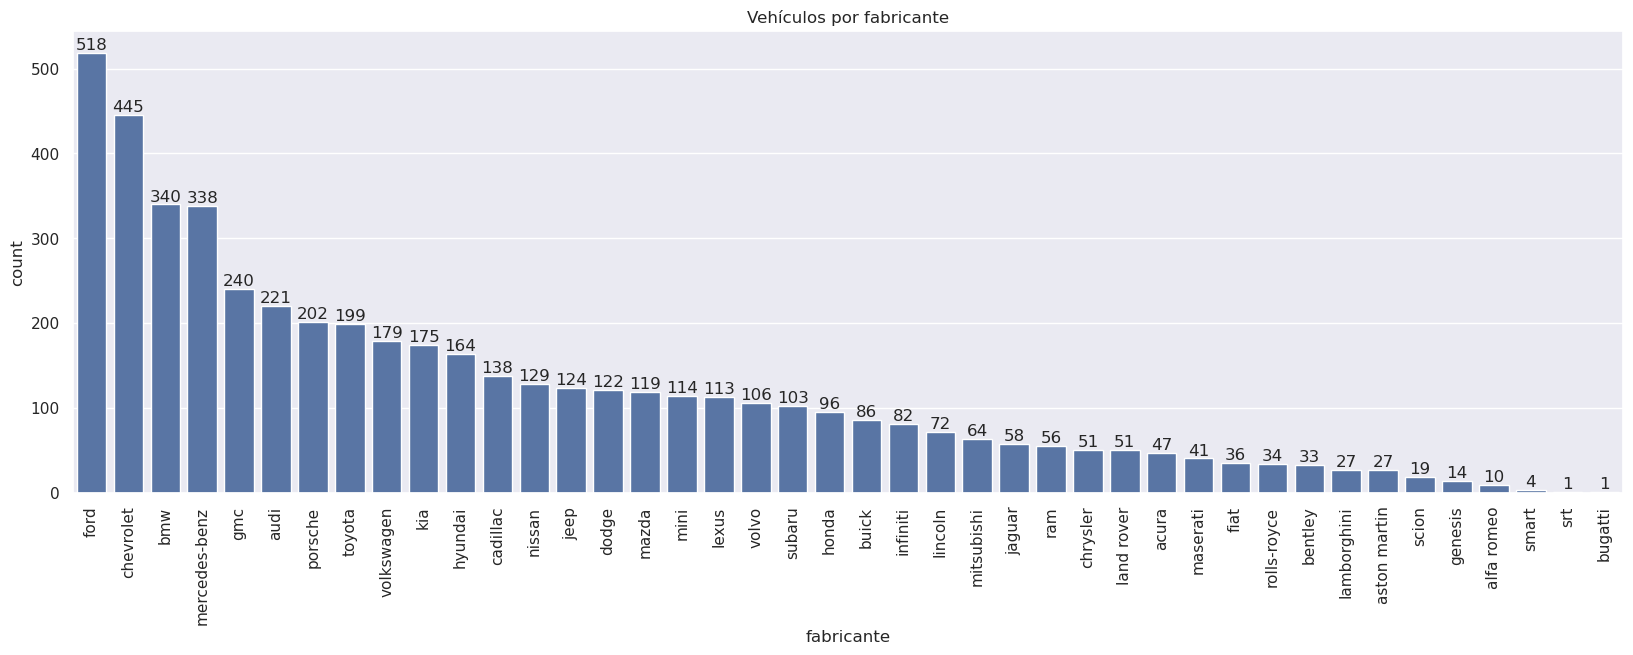

In [279]:
plt.figure(figsize=(20, 6)) 
ax = plt.subplot()
sns.set_theme(style='darkgrid')

a=sns.countplot(data=cars_cat,x='fabricante',order=cars_cat.fabricante.value_counts().index)
plt.xticks(rotation=90)

plt.bar_label(a.containers[0])
ax.set_title('Vehículos por fabricante')
plt.show()



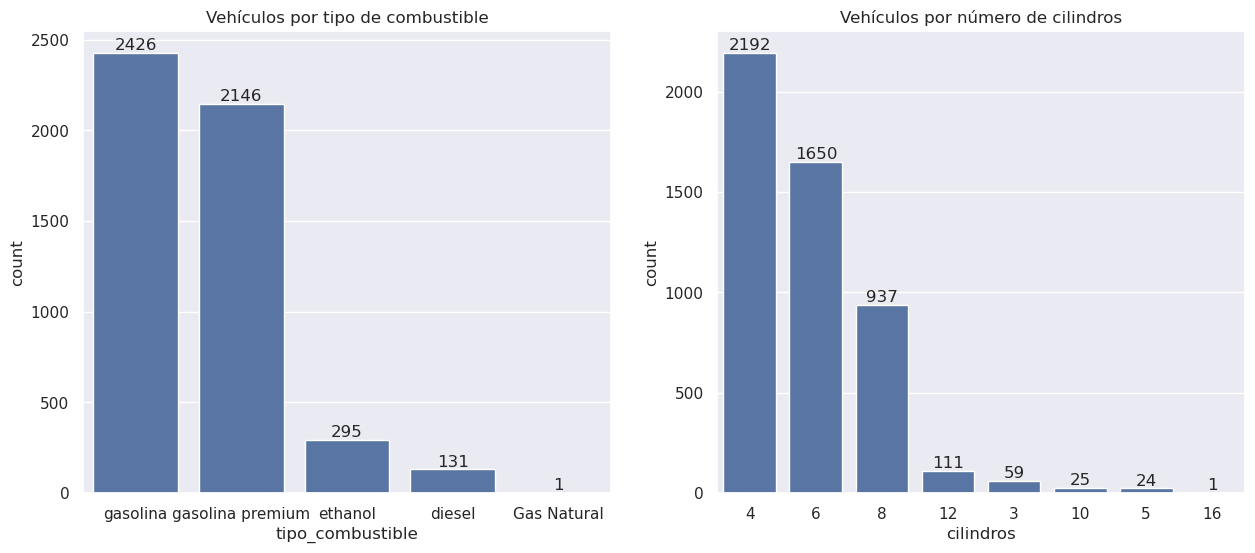

In [280]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1)
ax.set_title('Vehículos por tipo de combustible')
a=sns.countplot(data=cars_cat,x='tipo_combustible',order=cars_cat.tipo_combustible.value_counts().index)
plt.bar_label(a.containers[0])
ax = plt.subplot(1,2,2)
ax.set_title('Vehículos por número de cilindros')
b=sns.countplot(data=cars_cat,x='cilindros',order=cars_cat.cilindros.value_counts().index)
plt.bar_label(b.containers[0])
plt.show()

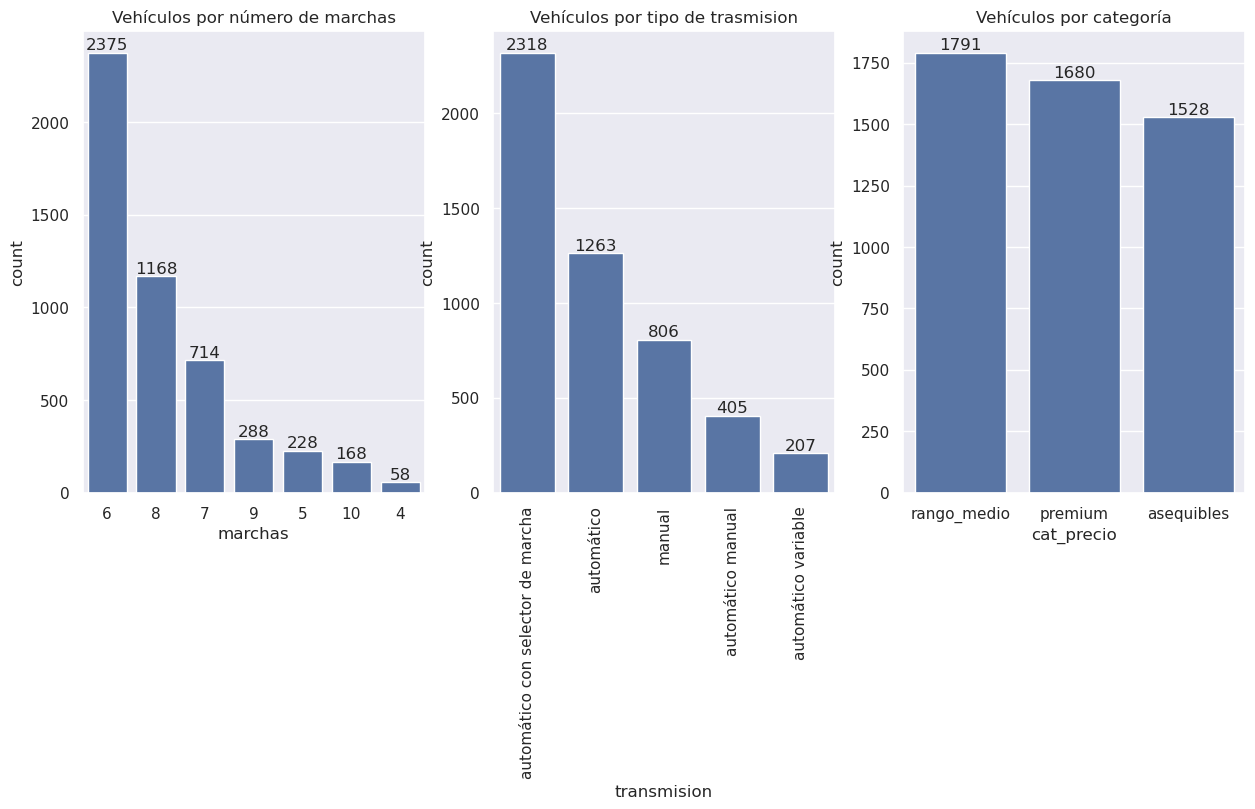

In [281]:
plt.figure(figsize=(15,6))
ax = plt.subplot(1,3,1)
ax.set_title('Vehículos por número de marchas')
a=sns.countplot(data=cars_cat,x='marchas',order=cars_cat.marchas.value_counts().index)
plt.bar_label(a.containers[0])
ax = plt.subplot(1,3,2)
ax.set_title('Vehículos por tipo de trasmision')
plt.xticks(rotation=90)
b=sns.countplot(data=cars_cat,x='transmision',order=cars_cat.transmision.value_counts().index)
plt.bar_label(b.containers[0])
ax = plt.subplot(1,3,3)
ax.set_title('Vehículos por categoría')
a=sns.countplot(data=cars_cat,x='cat_precio',order=cars_cat.cat_precio.value_counts().index)
plt.bar_label(a.containers[0])
plt.show()

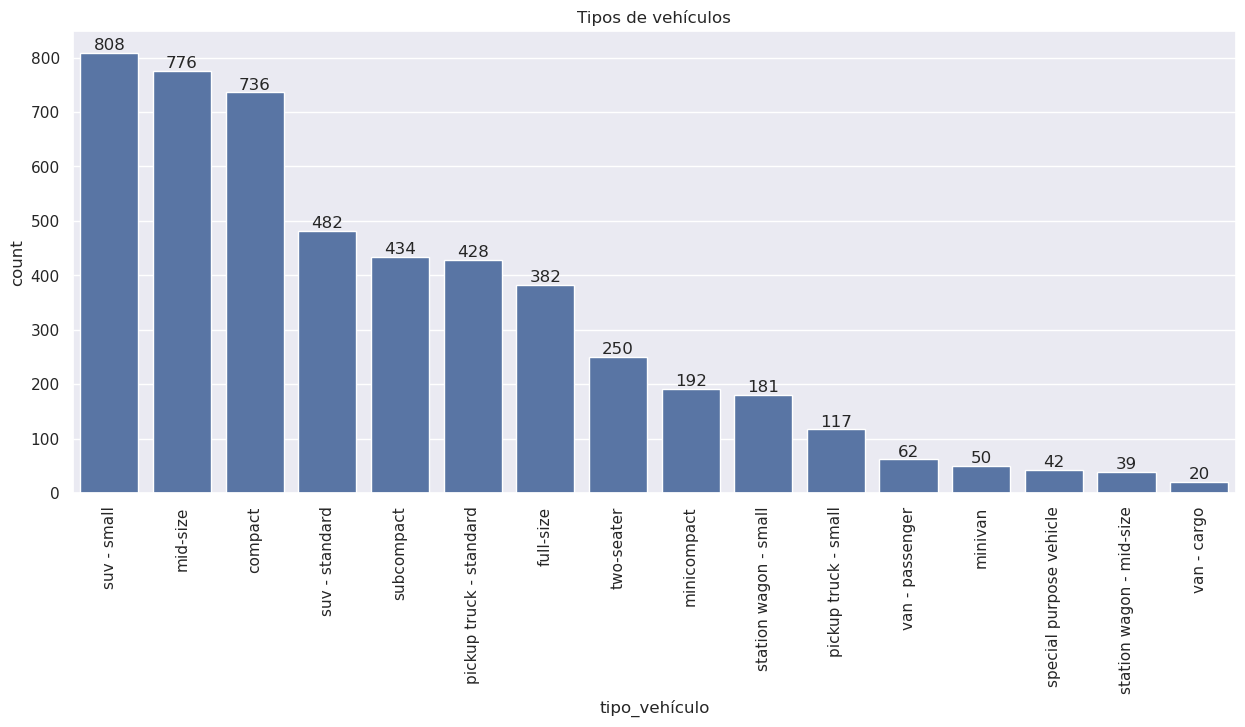

In [282]:

plt.figure(figsize=(15,6))

sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)
ax = plt.subplot()
ax.set_title('Tipos de vehículos')
a=sns.countplot(data=cars_cat,x='tipo_vehículo',order=cars_cat.tipo_vehículo.value_counts().index)
plt.bar_label(a.containers[0])
plt.show()

In [283]:
num_rows, num_cols = cars_cat.shape
for i,cat in enumerate(cars_cat.columns):
    val_counts = cars_cat[cat].value_counts()
    dominant_frac = val_counts.iloc[0] / num_rows
    print(f'`{val_counts.index[0]}` contribúe por si sóa nun {round(dominant_frac * 100, 2)}% de {cat}')

`ford` contribúe por si sóa nun 10.36% de fabricante
`suv - small` contribúe por si sóa nun 16.16% de tipo_vehículo
`automático con selector de marcha` contribúe por si sóa nun 46.37% de transmision
`gasolina` contribúe por si sóa nun 48.53% de tipo_combustible
`rango_medio` contribúe por si sóa nun 35.83% de cat_precio
`6` contribúe por si sóa nun 47.51% de marchas
`4` contribúe por si sóa nun 43.85% de cilindros


**Insights**
- Como se observa en las gráficas la mayoría de las categoría están desequilibradas.
- Vehículos por categoría es la única columna que está más o menos con una distribución uniforme.
- Predominan los vehículos de gasolina con cuatro o seis cilindros, de tamaño pequeño o mediano y de seis marchas automáticos.

#### Relaciones entre variables categóricas

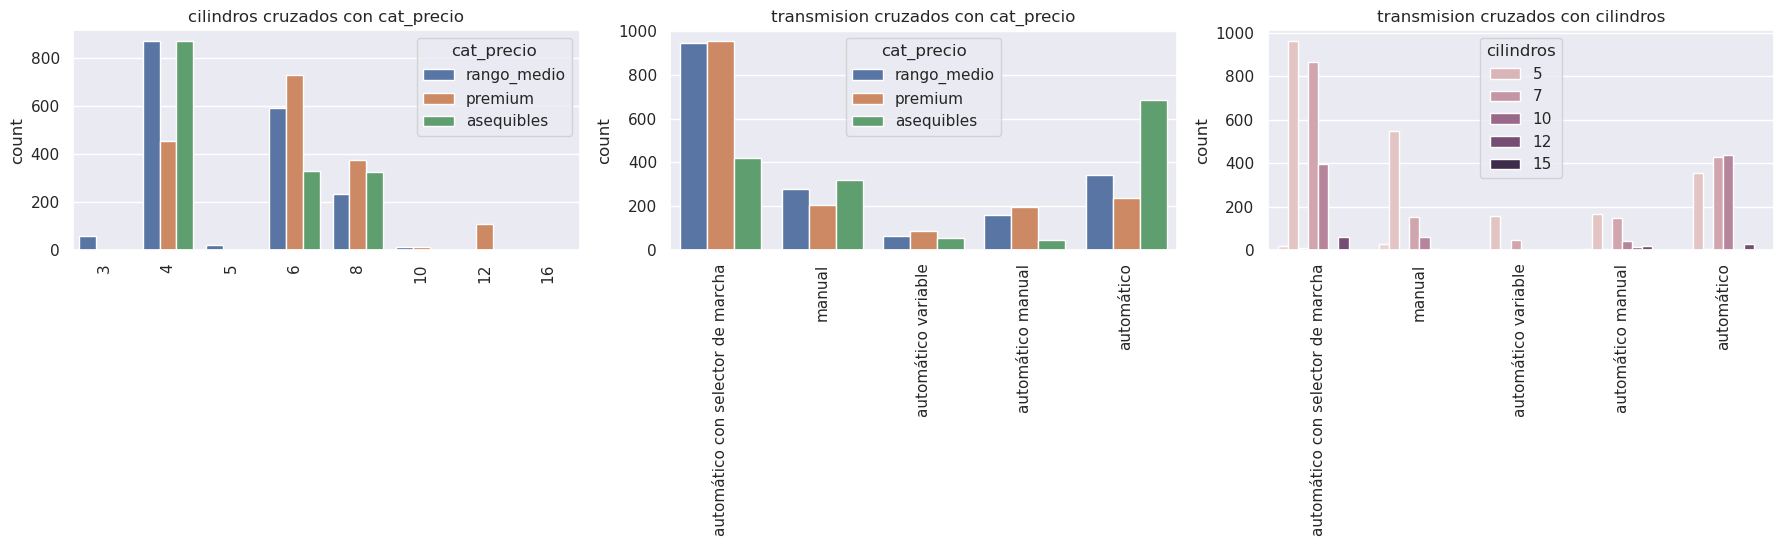

In [284]:
import itertools
combos = itertools.combinations(['cat_precio', 'cilindros', 'transmision'], 2)

fig = plt.figure(1, (18, 8))

i = 0
for pair in combos:


    i+=1
    ax = plt.subplot(2,3,i)
    sns.countplot(x=pair[1], hue=pair[0], data=cars_cat)
    ax.set_xlabel(None)
    ax.set_title(f'{pair[1]} cruzados con {pair[0]}')
    plt.xticks(rotation=90)
    plt.tight_layout()

**Análisis cruzado de las tres variables**

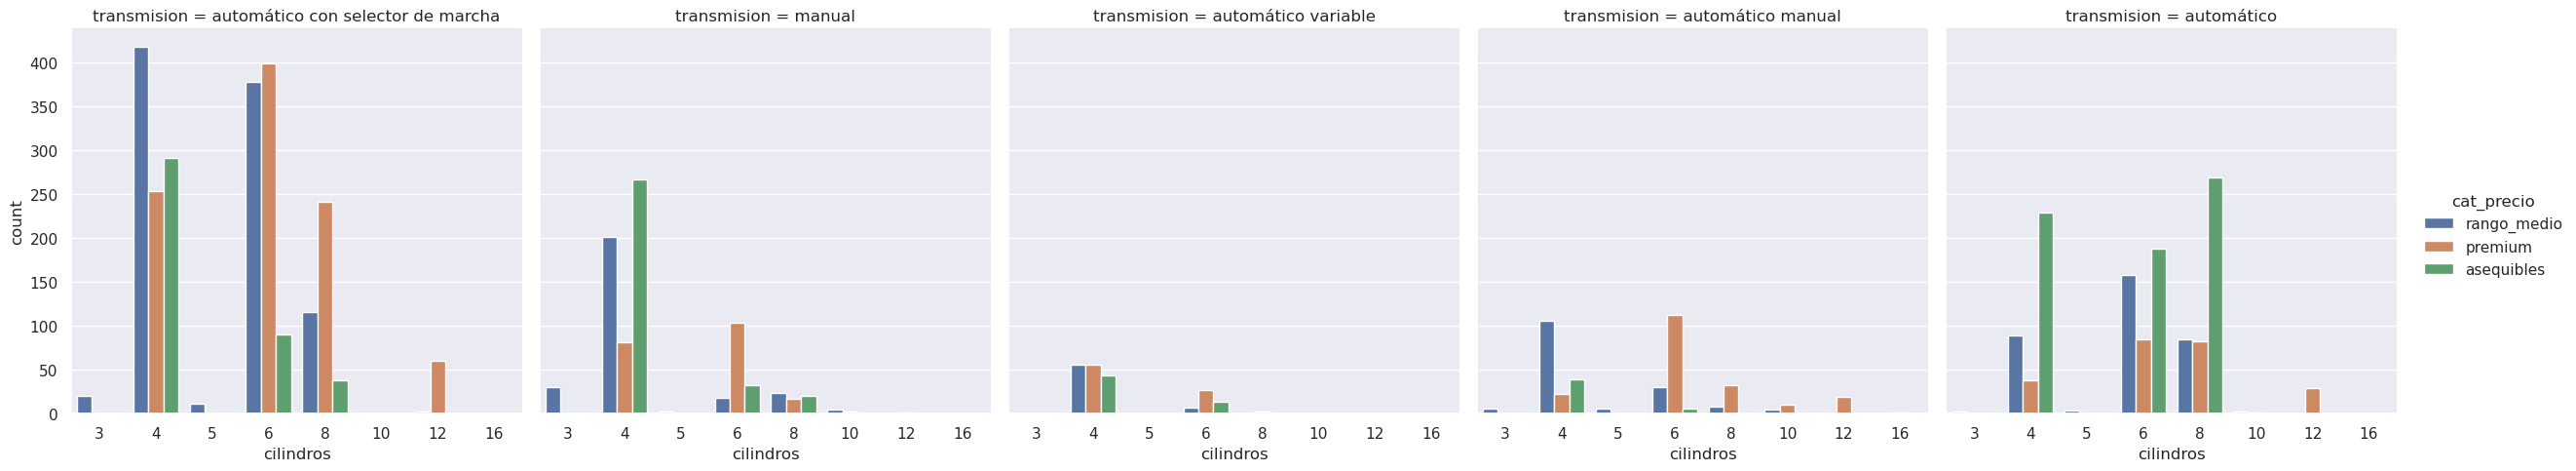

In [285]:
sns.catplot(x='cilindros', hue='cat_precio', col='transmision', data=cars_cat, kind='count')
plt.show()

**Insights**
- Se aprecia el desbalanceo de las categorías.

**Cilindros por categoria de precio**
- Los vehículos asequibles tienen en su mayoria 4 cilindros y en menor medida 6 u 8 cilindros.
- Los vehículos de rango medio tienen una distribución similar a los asequibles y son los únicos con 3 y 5 cilindros.
- Los vehículos premium son los que en general tienen más cilindros, siendo los únicos con 12 y 16 cilindros

**Trasmisión por categoria de precio**
- Los vehículos de rango medio y premium tienen principalmente cambio automático con selector de marchas.
- Los vehículos asequibles cambio automático.

**Trasmisión por cilindros**
- Los vehículos cambio automático con selector de marchas tienen principalmente 4 o 6 cilindros y también son los que tienen 12 cilindros.
- Los vehículos con cambio automático tienen 4, 6 u 8 cilindros.
- Los vehículos con cambio manual tiene 4 cilindros.



Análisis de 'tipo_combustible' por categoría precio

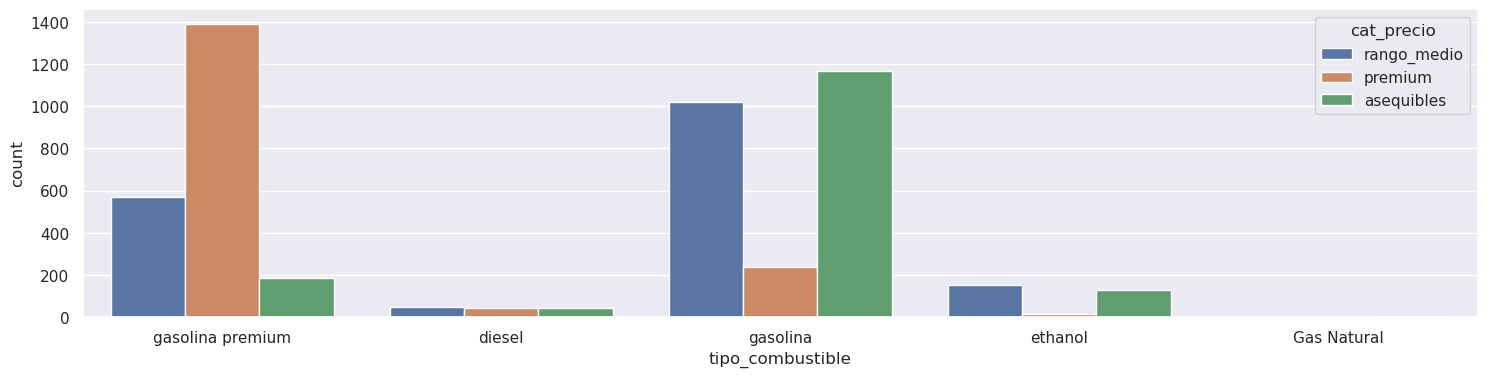

In [286]:
fig = plt.figure(1, (18,4))
sns.countplot(x='tipo_combustible', hue='cat_precio', data=cars_cat)

plt.show()

**Insights**
- Los vehículos premium utilizan fundamentalmente gasolina premium
- Los de rango medio y asequibles usan gasolina.
- El resto de combustibles están mucho menos representados

Análisis de categoría de precio por número de marchas

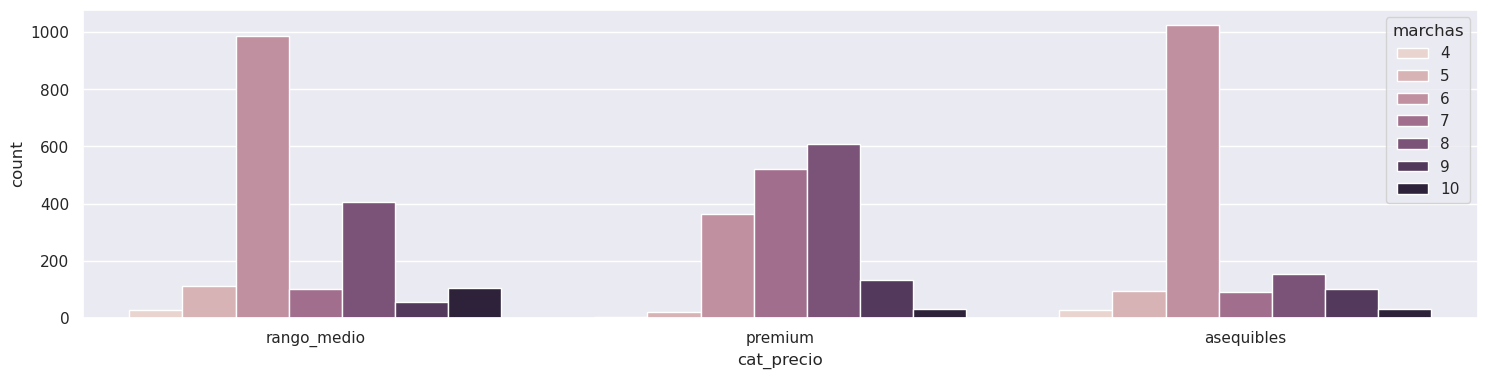

In [287]:
fig = plt.figure(1, (18,4))
sns.countplot(x='cat_precio', hue='marchas', data=cars_cat)
plt.show()

**Insights**
- Los vehículos de rango medio tienen principalmente 6 marchas igual que los asequibles.
- Los de categoría premium tienen mas de 7 y 8 marchas.


Análisis de tipo de vehículo por categoria de precio

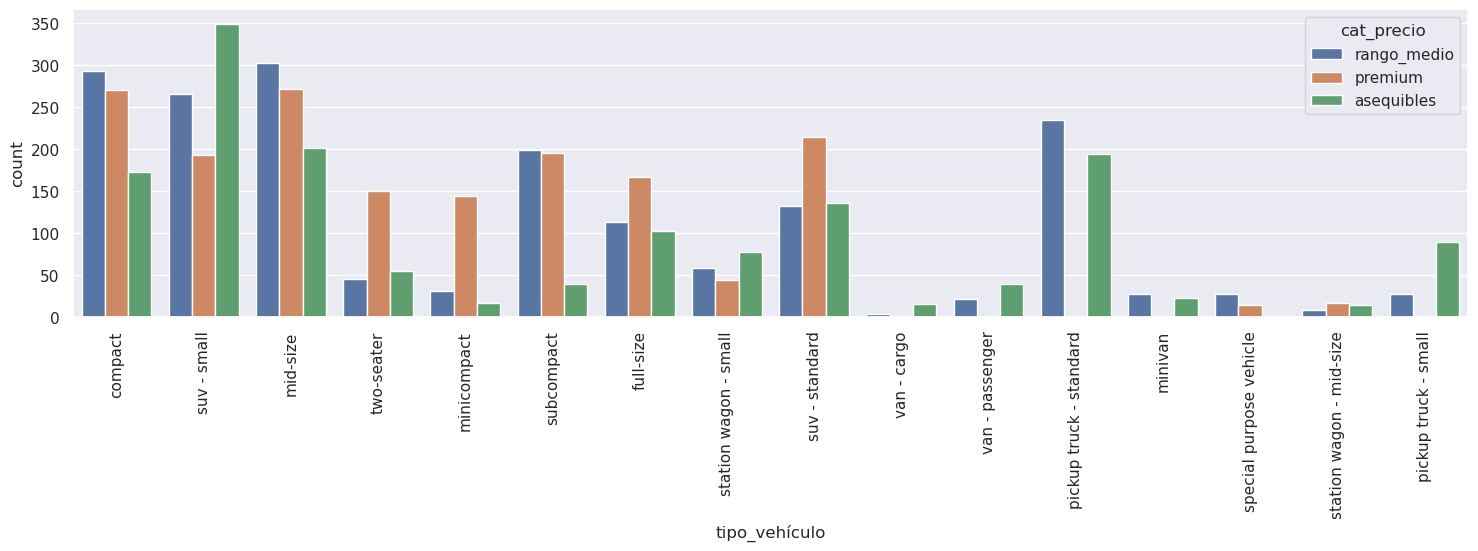

In [288]:
fig = plt.figure(2, (18,4))
sns.countplot(x='tipo_vehículo', hue='cat_precio', data=cars_cat)
plt.xticks(rotation=90)
plt.show()

**Insights**
- Vemos que las categorías Compacto, Suv pequeño y tamañoi medio son las que tiene más representación entre los tres tipos de categorías de precio.
- En categorias de furgonetas, pickup y minivan no se aprecian coches de categoría premium.

### Análisis de los valores numéricos

In [289]:
print(f'Variables numéricas:  {nums}')

Variables numéricas:  ['tamaño_motor', 'consumo_ciudad', 'consumo_carretera', 'consumo_combinado', 'mpg', 'co2']


In [290]:
cars.head()


,fabricante,tipo_vehículo,transmision,tipo_combustible,cat_precio,marchas,cilindros,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
0,acura,compact,automático con selector de marcha,gasolina premium,rango_medio,5,4,2.0,9.9,6.7,8.5,33,196
1,acura,compact,manual,gasolina premium,rango_medio,6,4,2.4,11.2,7.7,9.6,29,221
2,acura,compact,automático variable,gasolina premium,rango_medio,7,4,1.5,6.0,5.8,5.9,48,136
3,acura,suv - small,automático con selector de marcha,gasolina premium,rango_medio,6,6,3.5,12.7,9.1,11.1,25,255
4,acura,suv - small,automático con selector de marcha,gasolina premium,rango_medio,6,6,3.5,12.1,8.7,10.6,27,244


In [291]:
cars_num = cars.loc[:, 'tamaño_motor':]

In [292]:
cars_num.head()

,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
0,2.0,9.9,6.7,8.5,33,196
1,2.4,11.2,7.7,9.6,29,221
2,1.5,6.0,5.8,5.9,48,136
3,3.5,12.7,9.1,11.1,25,255
4,3.5,12.1,8.7,10.6,27,244


In [293]:
cars_num.describe()

,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,3.174875,12.743669,9.146569,11.124845,27.024405,252.924985
std,1.361080,3.499129,2.304187,2.928812,6.684076,57.840868
min,0.900000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,10.200000,7.500000,9.000000,22.000000,209.000000
50%,3.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,14.700000,10.300000,12.700000,31.000000,288.000000
max,8.400000,30.600000,20.600000,26.100000,69.000000,522.000000


Visualizo con gráficas las categorías numéricas

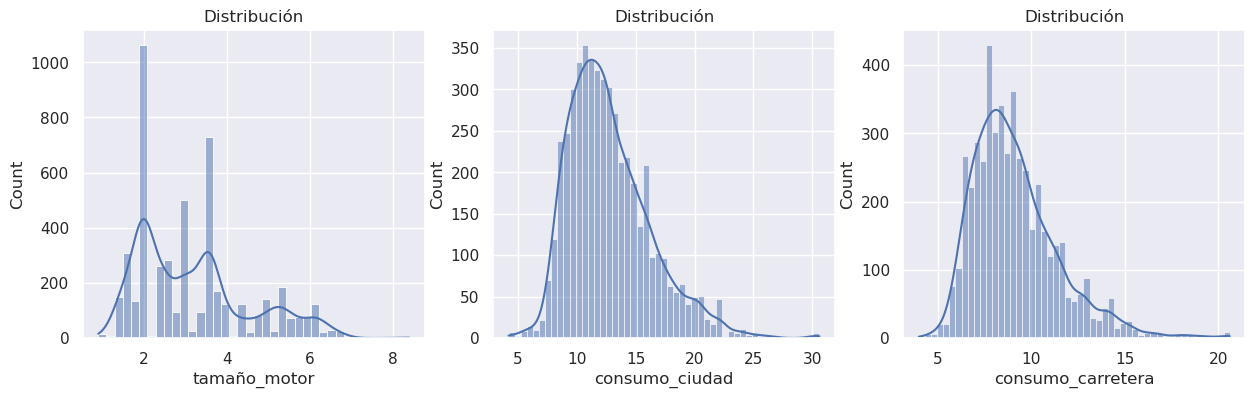

In [294]:
plt.figure(figsize=(15,4))
ax = plt.subplot(1,3,1)
ax.set_title('Distribución')
sns.histplot(cars_num["tamaño_motor"], kde=True)

ax = plt.subplot(1,3,2)
ax.set_title('Distribución')
sns.histplot(cars_num["consumo_ciudad"], kde=True)

ax = plt.subplot(1,3,3)
ax.set_title('Distribución')
sns.histplot(cars_num["consumo_carretera"], kde=True)


plt.show()

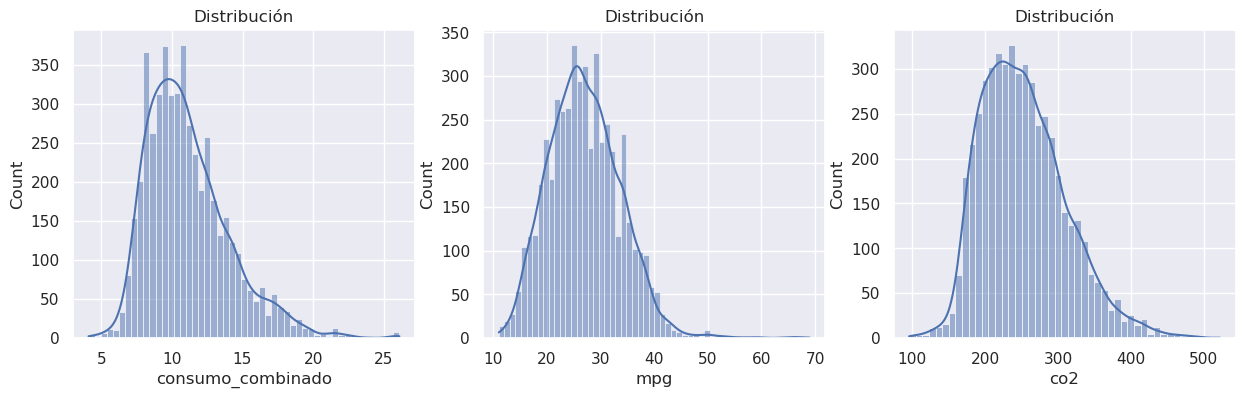

In [295]:
plt.figure(figsize=(15,4))
ax = plt.subplot(1,3,1)
ax.set_title('Distribución')
sns.histplot(cars_num["consumo_combinado"], kde=True)

ax = plt.subplot(1,3,2)
ax.set_title('Distribución')
sns.histplot(cars_num["mpg"], kde=True)

ax = plt.subplot(1,3,3)
ax.set_title('Distribución')
sns.histplot(cars_num["co2"], kde=True)
plt.show()

**Insights**
- Vemos que la mayoría de las distribuciones se asemejan a la normal desplazadas ligeramente hacia la izquierda.
- 'Tamaño_motor' es la única que no tiene una distribución parecida a la normal


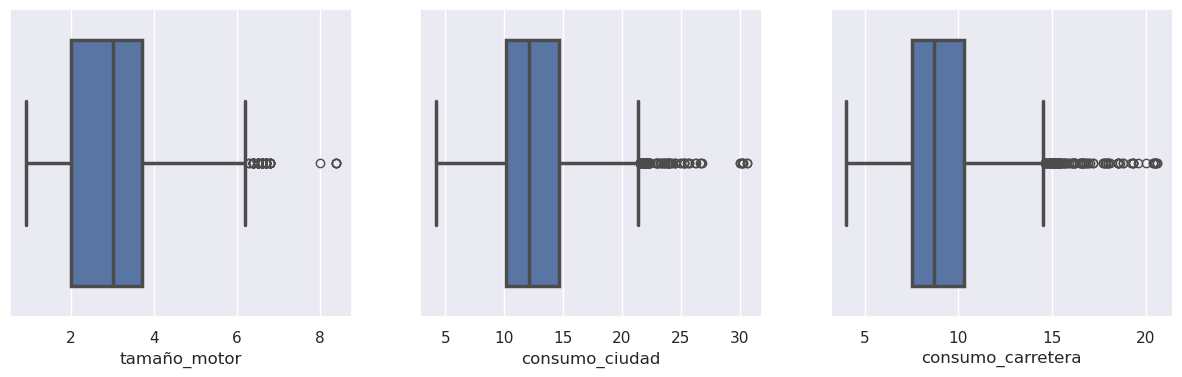

In [296]:
plt.figure(figsize=(15,4))
ax = plt.subplot(1,3,1)

sns.boxplot(cars_num["tamaño_motor"], orient='h', linewidth=2.5)

ax = plt.subplot(1,3,2)

sns.boxplot(cars_num["consumo_ciudad"], orient='h', linewidth=2.5)
ax = plt.subplot(1,3,3)

sns.boxplot(cars_num["consumo_carretera"], orient='h', linewidth=2.5)

plt.show()

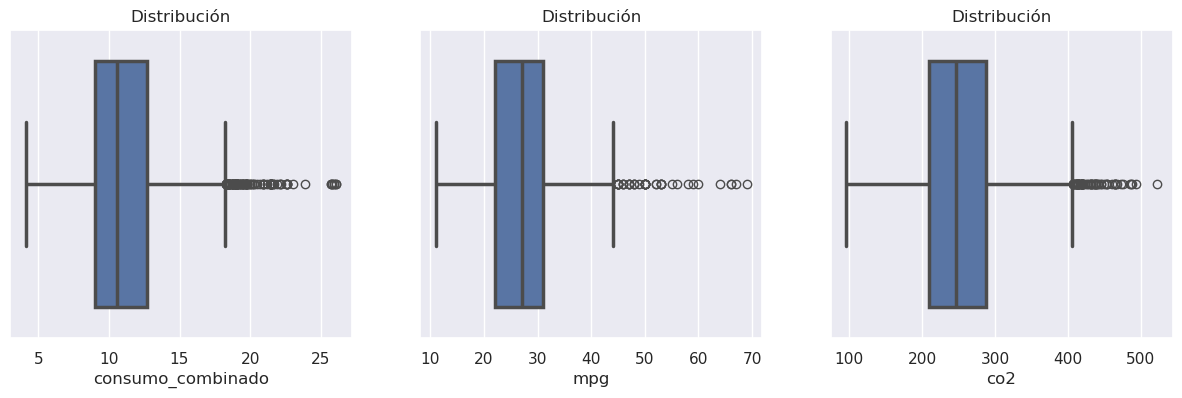

In [297]:
plt.figure(figsize=(15,4))
ax = plt.subplot(1,3,1)
ax.set_title('Distribución')
sns.boxplot(cars_num["consumo_combinado"], orient='h', linewidth=2.5)
ax = plt.subplot(1,3,2)
ax.set_title('Distribución')
sns.boxplot(cars_num["mpg"], orient='h', linewidth=2.5)
ax = plt.subplot(1,3,3)
ax.set_title('Distribución')
sns.boxplot(cars_num["co2"], orient='h', linewidth=2.5)

plt.show()

**Insights**
- Se ve la presencia de outliers enm todas las categorías, seguramente representados por vehículos de gran cilindrada y vehículos grandes y por tanto gran consumo y emisiones.
- En mpg los outliers pertenecen a vehículos con poco consumo y bajas emisiones.

Análisis de outliers

In [298]:
# Utilizando a formula de tukey

def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

for col in nums:
    outliers = tukey_outliers(cars_num[col])
    if len(outliers):
        print(f"* {col} tiene estos outliers,\n{outliers}\n")
    else:
        print(f"* {col} no tiene outliers.\n")

* tamaño_motor tiene estos outliers,
31      6.3
64      6.8
249     6.4
259     6.4
260     6.4
       ... 
4876    6.5
4941    6.7
4942    6.6
4943    6.6
4944    6.6
Name: tamaño_motor, Length: 85, dtype: float64

* consumo_ciudad tiene estos outliers,
64      22.3
149     23.3
151     25.7
181     23.5
183     23.7
        ... 
4782    22.1
4801    22.2
4808    21.8
4819    22.2
4876    26.2
Name: consumo_ciudad, Length: 109, dtype: float64

* consumo_carretera tiene estos outliers,
64      14.9
149     16.1
151     17.8
181     17.7
183     18.8
        ... 
4782    16.8
4801    16.2
4808    16.8
4819    15.3
4876    15.5
Name: consumo_carretera, Length: 133, dtype: float64

* consumo_combinado tiene estos outliers,
64      19.0
149     20.1
151     22.1
181     20.9
183     21.5
        ... 
4782    19.8
4801    19.5
4808    19.5
4819    19.1
4876    21.4
Name: consumo_combinado, Length: 115, dtype: float64

* mpg tiene estos outliers,
2       48
435     45
456     46
457     45


Muestra de los outliers de cada columna

In [299]:
cars.iloc[list(tukey_outliers(cars_num.tamaño_motor).index)]

,fabricante,tipo_vehículo,transmision,tipo_combustible,cat_precio,marchas,cilindros,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
31,audi,full-size,automático con selector de marcha,gasolina premium,rango_medio,8,12,6.3,18.7,11.5,15.5,18,363
64,bentley,mid-size,automático con selector de marcha,gasolina premium,premium,8,8,6.8,22.3,14.9,19.0,15,437
249,chrysler,full-size,automático,gasolina premium,rango_medio,5,8,6.4,16.7,10.3,13.8,20,317
259,dodge,mid-size,manual,gasolina premium,rango_medio,6,8,6.4,16.8,10.4,13.9,20,320
260,dodge,mid-size,automático,gasolina premium,rango_medio,5,8,6.4,16.7,10.3,13.8,20,317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,lamborghini,two-seater,automático manual,gasolina premium,premium,7,12,6.5,26.2,15.5,21.4,13,485
4941,rolls-royce,station wagon - mid-size,automático con selector de marcha,gasolina premium,premium,8,12,6.7,20.1,12.1,16.5,17,386
4942,rolls-royce,compact,automático con selector de marcha,gasolina premium,premium,8,12,6.6,20.4,13.1,17.1,17,400
4943,rolls-royce,full-size,automático con selector de marcha,gasolina premium,premium,8,12,6.6,20.4,13.1,17.1,17,400


In [300]:
cars.iloc[list(tukey_outliers(cars_num.consumo_ciudad).index)]

,fabricante,tipo_vehículo,transmision,tipo_combustible,cat_precio,marchas,cilindros,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
64,bentley,mid-size,automático con selector de marcha,gasolina premium,premium,8,8,6.8,22.3,14.9,19.0,15,437
149,cadillac,suv - standard,automático,ethanol,premium,6,8,6.2,23.3,16.1,20.1,14,322
151,cadillac,suv - standard,automático,ethanol,premium,6,8,6.2,25.7,17.8,22.1,13,354
181,chevrolet,van - cargo,automático,ethanol,asequibles,4,8,5.3,23.5,17.7,20.9,14,334
183,chevrolet,van - cargo,automático,ethanol,asequibles,4,8,5.3,23.7,18.8,21.5,13,344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,ford,van - passenger,automático con selector de marcha,ethanol,rango_medio,10,6,3.5,22.1,16.8,19.8,14,328
4801,gmc,pickup truck - standard,automático,ethanol,asequibles,6,8,5.3,22.2,16.2,19.5,14,326
4808,gmc,pickup truck - standard,automático,ethanol,asequibles,6,8,5.3,21.8,16.8,19.5,14,325
4819,gmc,suv - standard,automático,ethanol,asequibles,6,8,5.3,22.2,15.3,19.1,15,319


In [301]:
cars.iloc[list(tukey_outliers(cars_num.consumo_carretera).index)]

,fabricante,tipo_vehículo,transmision,tipo_combustible,cat_precio,marchas,cilindros,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
64,bentley,mid-size,automático con selector de marcha,gasolina premium,premium,8,8,6.8,22.3,14.9,19.0,15,437
149,cadillac,suv - standard,automático,ethanol,premium,6,8,6.2,23.3,16.1,20.1,14,322
151,cadillac,suv - standard,automático,ethanol,premium,6,8,6.2,25.7,17.8,22.1,13,354
181,chevrolet,van - cargo,automático,ethanol,asequibles,4,8,5.3,23.5,17.7,20.9,14,334
183,chevrolet,van - cargo,automático,ethanol,asequibles,4,8,5.3,23.7,18.8,21.5,13,344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,ford,van - passenger,automático con selector de marcha,ethanol,rango_medio,10,6,3.5,22.1,16.8,19.8,14,328
4801,gmc,pickup truck - standard,automático,ethanol,asequibles,6,8,5.3,22.2,16.2,19.5,14,326
4808,gmc,pickup truck - standard,automático,ethanol,asequibles,6,8,5.3,21.8,16.8,19.5,14,325
4819,gmc,suv - standard,automático,ethanol,asequibles,6,8,5.3,22.2,15.3,19.1,15,319


In [302]:
cars.iloc[list(tukey_outliers(cars_num.consumo_combinado).index)]

,fabricante,tipo_vehículo,transmision,tipo_combustible,cat_precio,marchas,cilindros,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
64,bentley,mid-size,automático con selector de marcha,gasolina premium,premium,8,8,6.8,22.3,14.9,19.0,15,437
149,cadillac,suv - standard,automático,ethanol,premium,6,8,6.2,23.3,16.1,20.1,14,322
151,cadillac,suv - standard,automático,ethanol,premium,6,8,6.2,25.7,17.8,22.1,13,354
181,chevrolet,van - cargo,automático,ethanol,asequibles,4,8,5.3,23.5,17.7,20.9,14,334
183,chevrolet,van - cargo,automático,ethanol,asequibles,4,8,5.3,23.7,18.8,21.5,13,344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,ford,van - passenger,automático con selector de marcha,ethanol,rango_medio,10,6,3.5,22.1,16.8,19.8,14,328
4801,gmc,pickup truck - standard,automático,ethanol,asequibles,6,8,5.3,22.2,16.2,19.5,14,326
4808,gmc,pickup truck - standard,automático,ethanol,asequibles,6,8,5.3,21.8,16.8,19.5,14,325
4819,gmc,suv - standard,automático,ethanol,asequibles,6,8,5.3,22.2,15.3,19.1,15,319


In [303]:
cars.iloc[list(tukey_outliers(cars_num.mpg).index)]

,fabricante,tipo_vehículo,transmision,tipo_combustible,cat_precio,marchas,cilindros,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
2,acura,compact,automático variable,gasolina premium,rango_medio,7,4,1.5,6.0,5.8,5.9,48,136
435,honda,two-seater,automático variable,gasolina,asequibles,7,4,1.5,6.6,6.0,6.3,45,145
456,hyundai,mid-size,automático con selector de marcha,gasolina,asequibles,6,4,2.4,6.5,5.9,6.2,46,143
457,hyundai,mid-size,automático con selector de marcha,gasolina,asequibles,6,4,2.4,6.6,5.9,6.3,45,145
538,kia,mid-size,automático con selector de marcha,gasolina,asequibles,6,4,2.4,6.5,5.9,6.2,46,143
574,lexus,mid-size,automático variable,gasolina,premium,6,4,2.5,5.8,6.2,6.0,47,138
887,volkswagen,compact,automático manual,gasolina premium,rango_medio,7,4,1.4,5.6,5.2,5.4,52,124
912,acura,compact,automático variable,gasolina premium,rango_medio,7,4,1.5,6.0,6.1,6.1,46,140
1344,kia,mid-size,automático con selector de marcha,gasolina,asequibles,6,4,2.4,6.6,5.9,6.3,45,145
1371,lexus,mid-size,automático variable,gasolina,premium,6,4,2.5,5.8,6.1,5.9,48,136


In [304]:
cars.iloc[list(tukey_outliers(cars_num.co2).index)]

,fabricante,tipo_vehículo,transmision,tipo_combustible,cat_precio,marchas,cilindros,tamaño_motor,consumo_ciudad,consumo_carretera,consumo_combinado,mpg,co2
41,audi,two-seater,manual,gasolina premium,rango_medio,6,8,4.2,21.2,13.4,17.7,16,407
43,audi,two-seater,manual,gasolina premium,rango_medio,6,10,5.2,21.1,13.8,17.8,16,409
64,bentley,mid-size,automático con selector de marcha,gasolina premium,premium,8,8,6.8,22.3,14.9,19.0,15,437
191,chevrolet,van - passenger,automático,gasolina,asequibles,6,8,4.8,21.1,14.2,18.0,16,414
192,chevrolet,van - passenger,automático,gasolina,asequibles,6,8,6.0,21.9,15.0,18.8,15,432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,mercedes-benz,suv - standard,automático,gasolina premium,premium,7,8,4.0,18.2,16.5,17.5,16,410
4066,bentley,mid-size,automático con selector de marcha,gasolina premium,premium,8,8,6.8,24.5,14.4,20.0,14,465
4348,lamborghini,two-seater,automático manual,gasolina premium,premium,7,12,6.5,26.3,15.6,21.5,13,487
4349,lamborghini,two-seater,automático manual,gasolina premium,premium,7,12,6.5,26.6,15.8,21.7,13,493


**Insights**
- Como se observaba en las gráficas anteriores los outliers de consumos, tamaño de motor y emisiones de co2 representan principalmente a vehículos de gran tamaño y vehículos premium.
- En mpg los outliers representan a vehiculos pequeños y con poco consumo y emisiones.

Relación entre las categorías numéricas

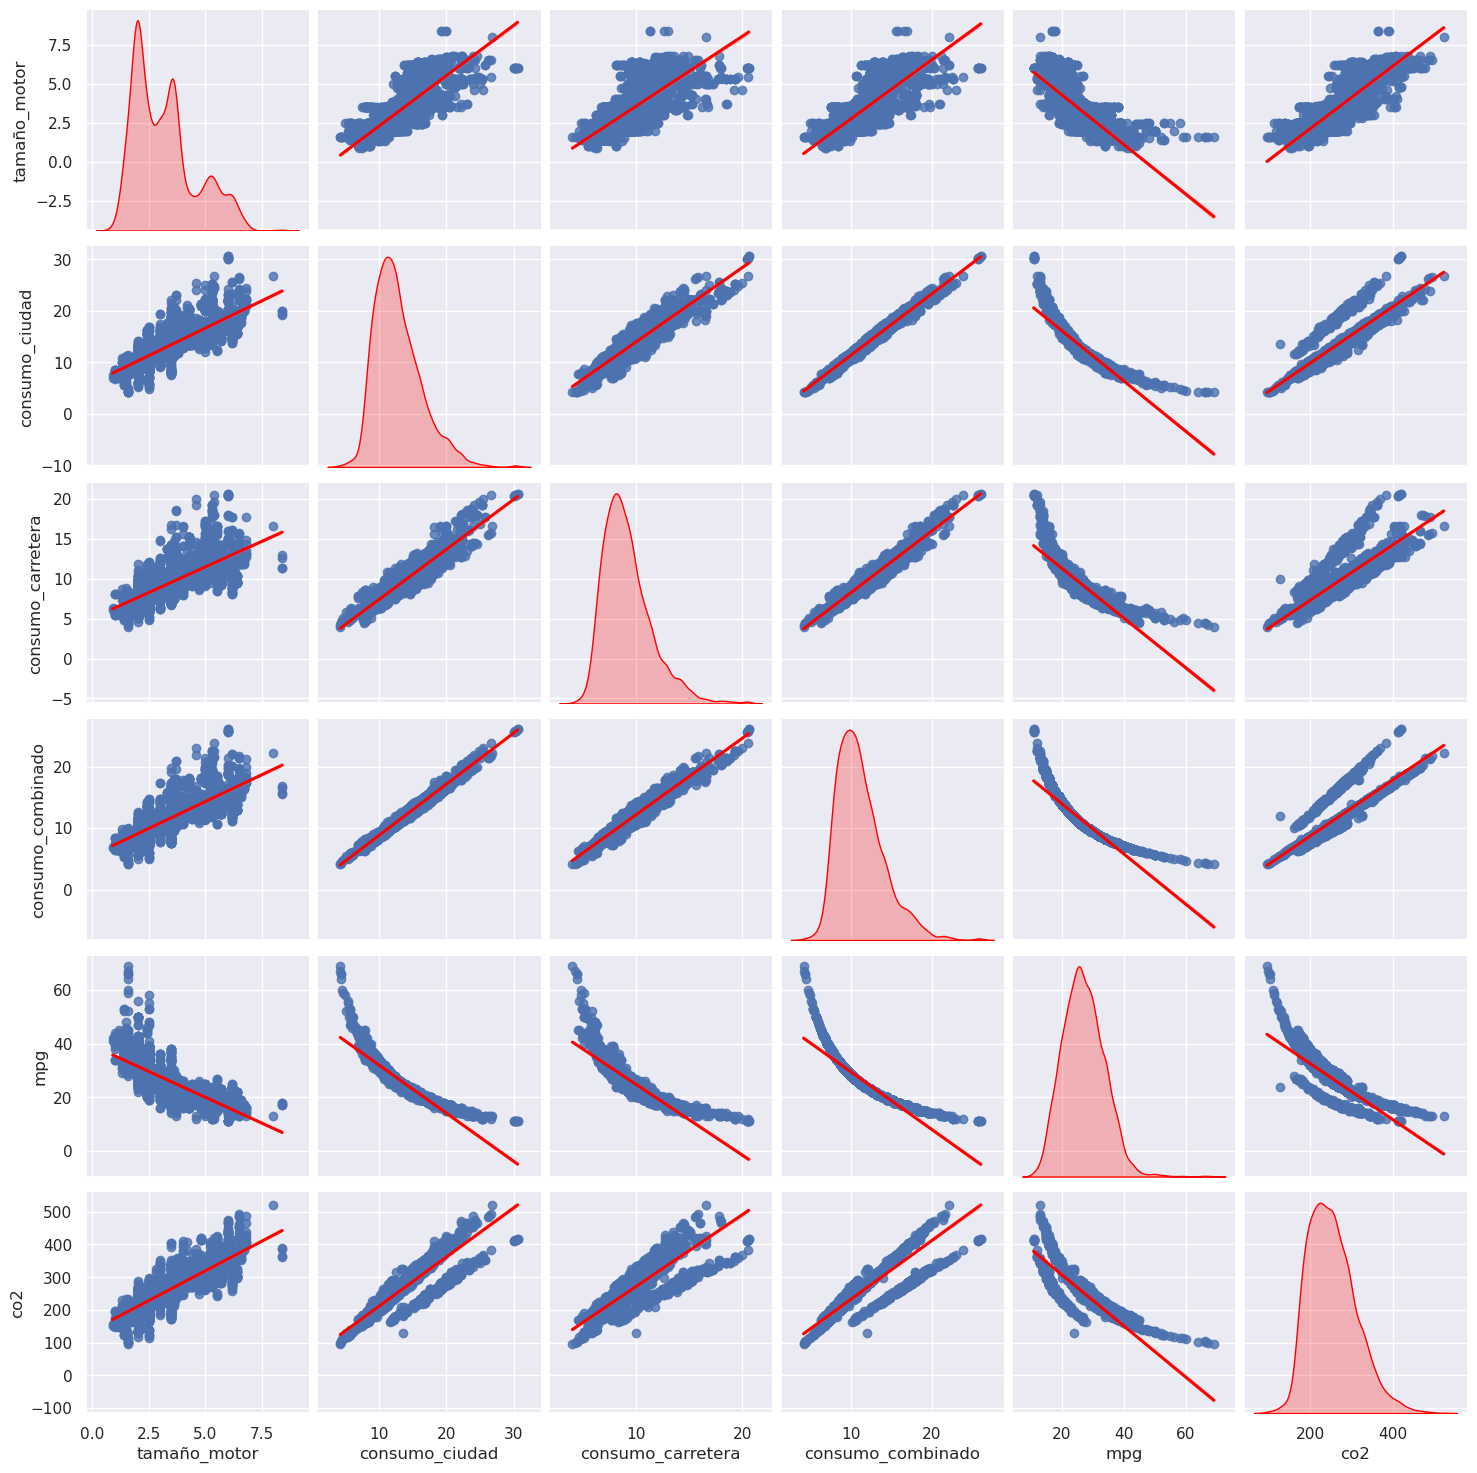

In [305]:
sns.pairplot(cars_num, kind = "reg", diag_kind = "kde", 
             diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}})

Mapa de calor de correlaciones

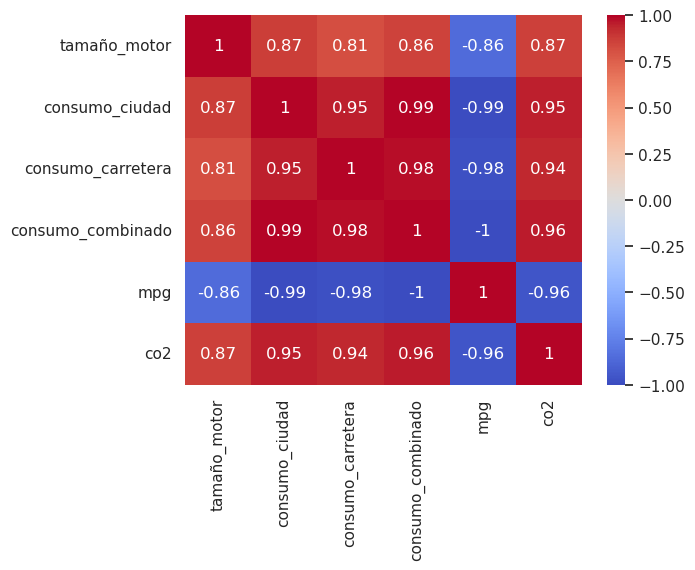

In [306]:
sns.heatmap(cars_num.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm')
plt.show()

**Insights**
- Todas las categorías tienen una correlación positiva alta salvo mpg que es negativa ya que a mayor mpg menor consumo y emisiones.

#### Comparación categorías numéricas con categóricas

Categorías numéricas con tipo de categoría de vehículo

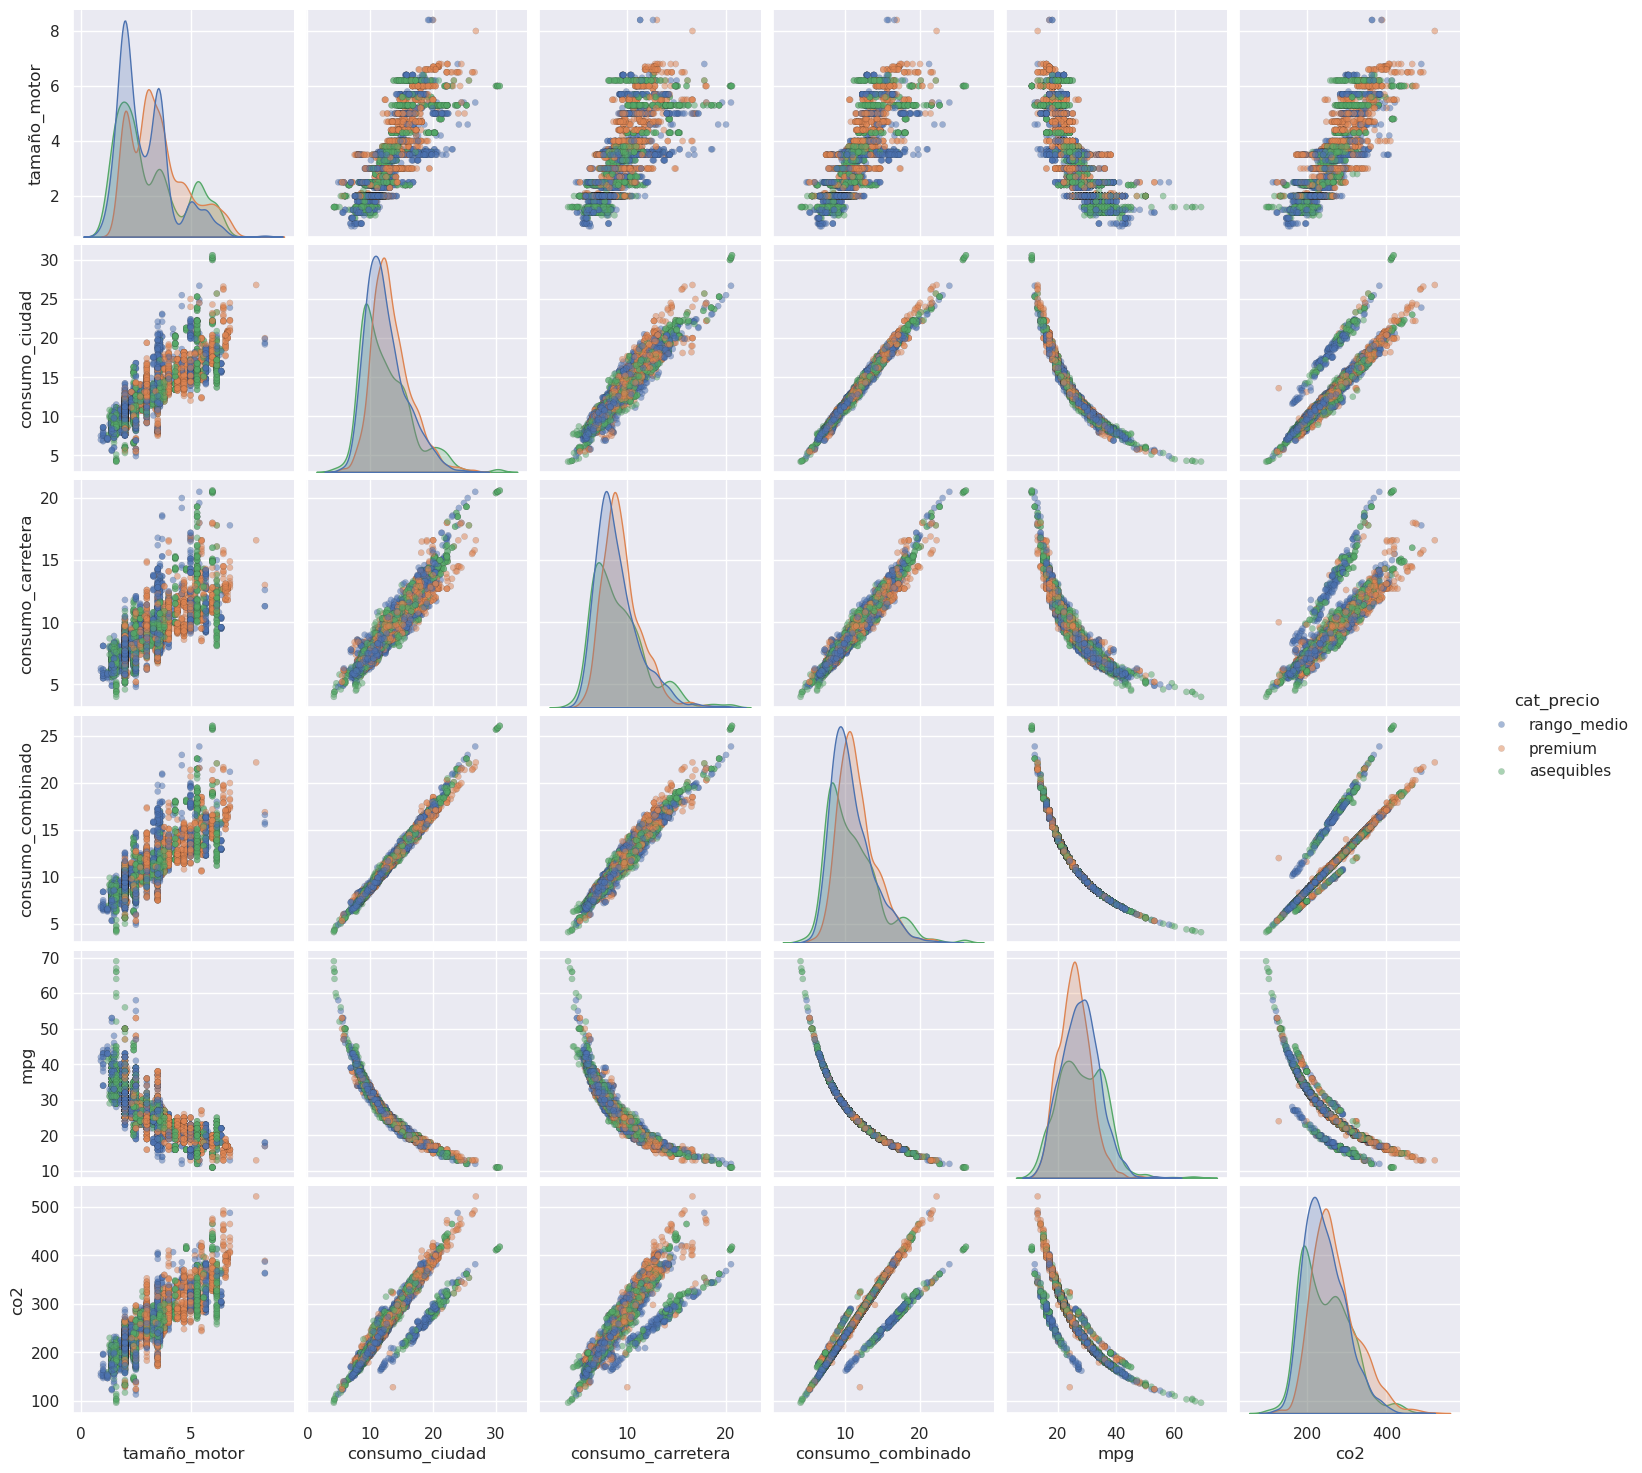

In [307]:
sns.pairplot(data=cars, vars=nums, diag_kind='kde', hue='cat_precio',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))
plt.show()

**Insight**
- Los vehículos asequibles tienden a tener algo menos de consumo y de emisiones.
- Los vehículos del grupo premium parecen los mas contaminates y con mayor consumo.

Categorías numéricas con el tipo de combustible

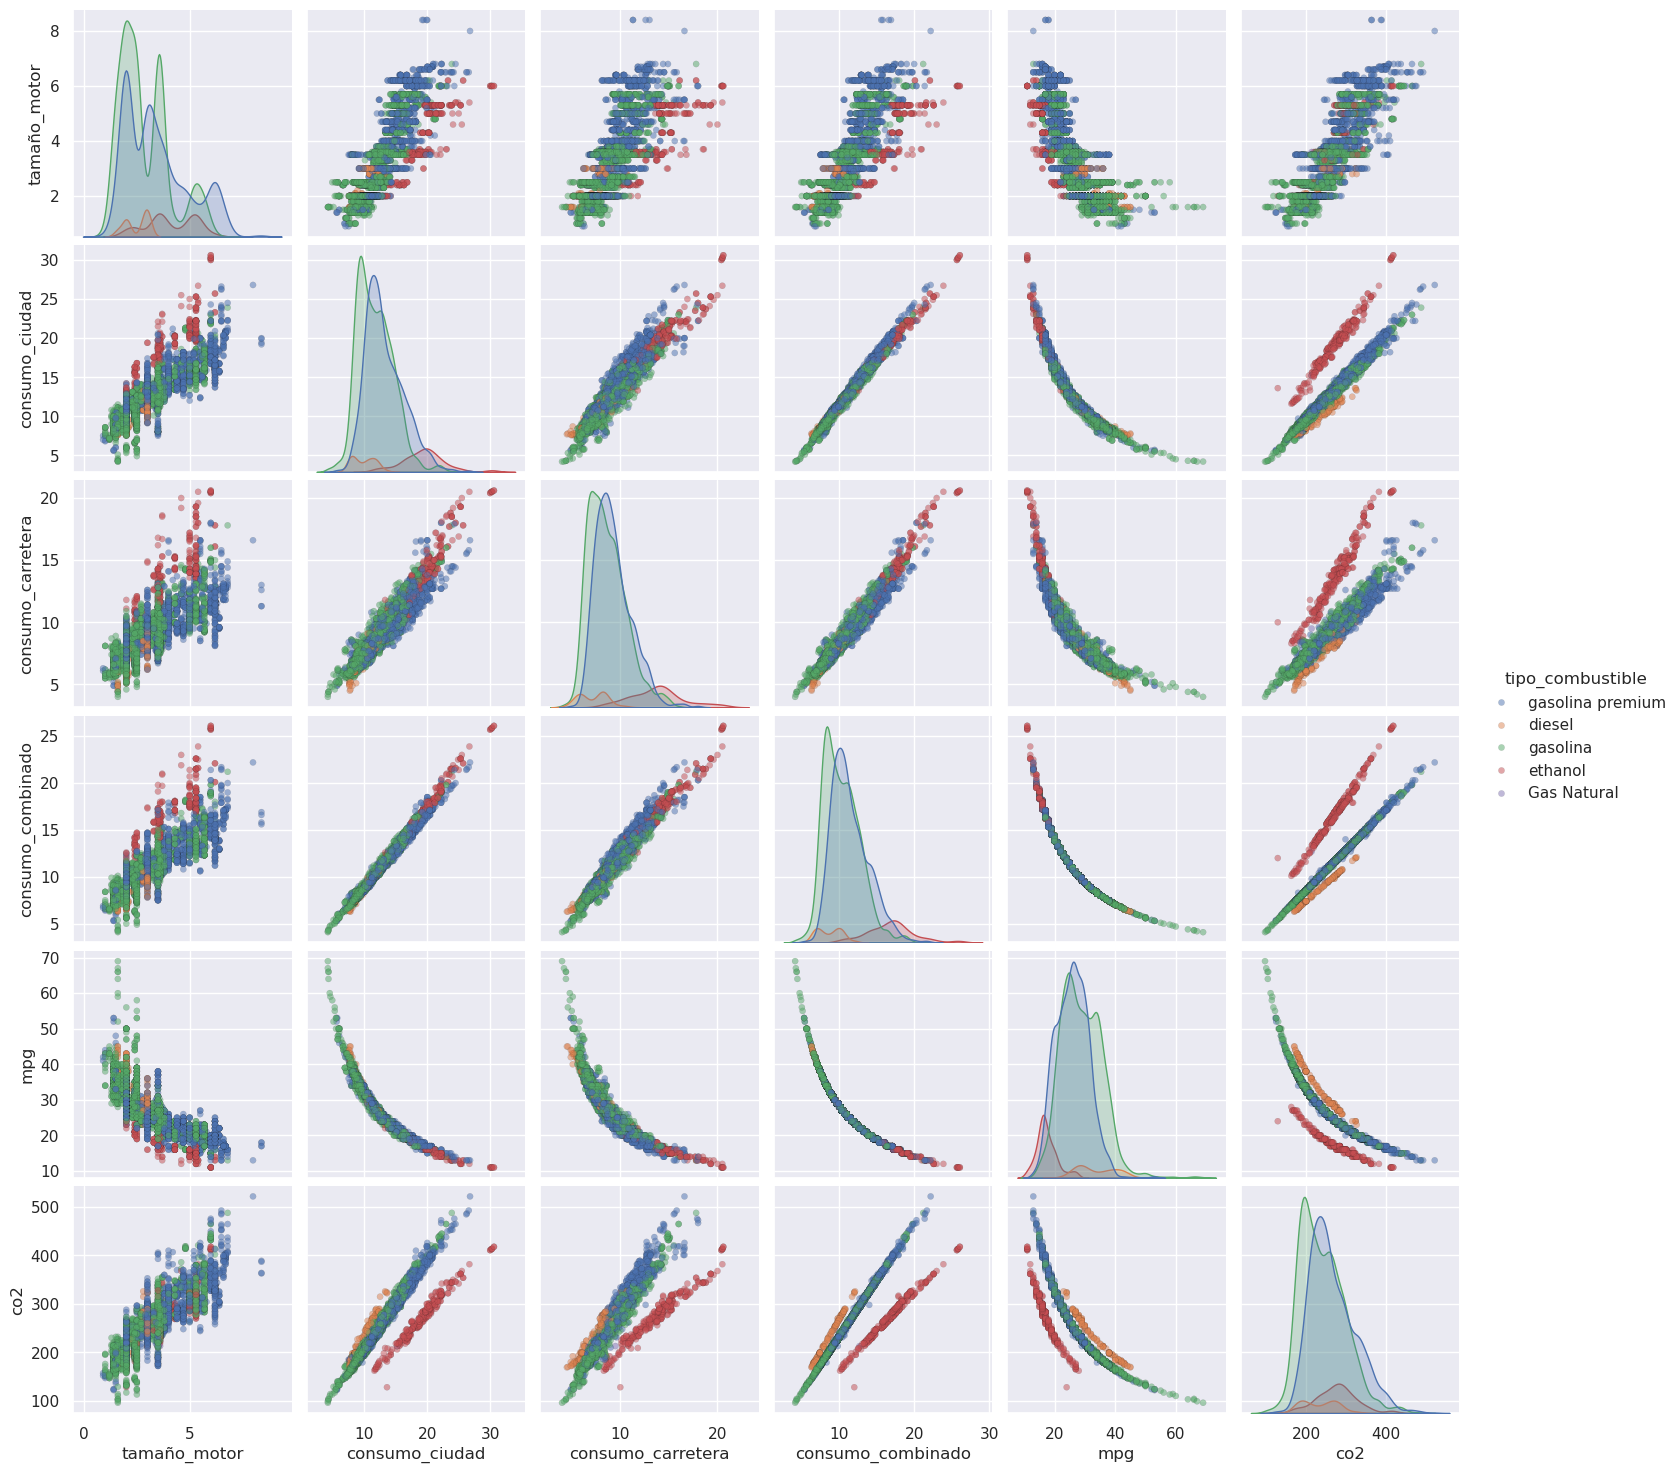

In [308]:
sns.pairplot(data=cars, vars=nums, diag_kind='kde', hue='tipo_combustible',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(fill=True))
plt.show()

**Insights**
- Parece que los vehículos de gasolina premium y de gasolina son los que más emisiones tienen.
- El etanol parece el combustible que menos mpg tiene  y menor emisiones de CO2 por litros consumidos.
- Los vehículos diesel tienen menor consumo y mayor emision de CO2 por litro consumido.

CO2, Consumo_combinado y cilindros

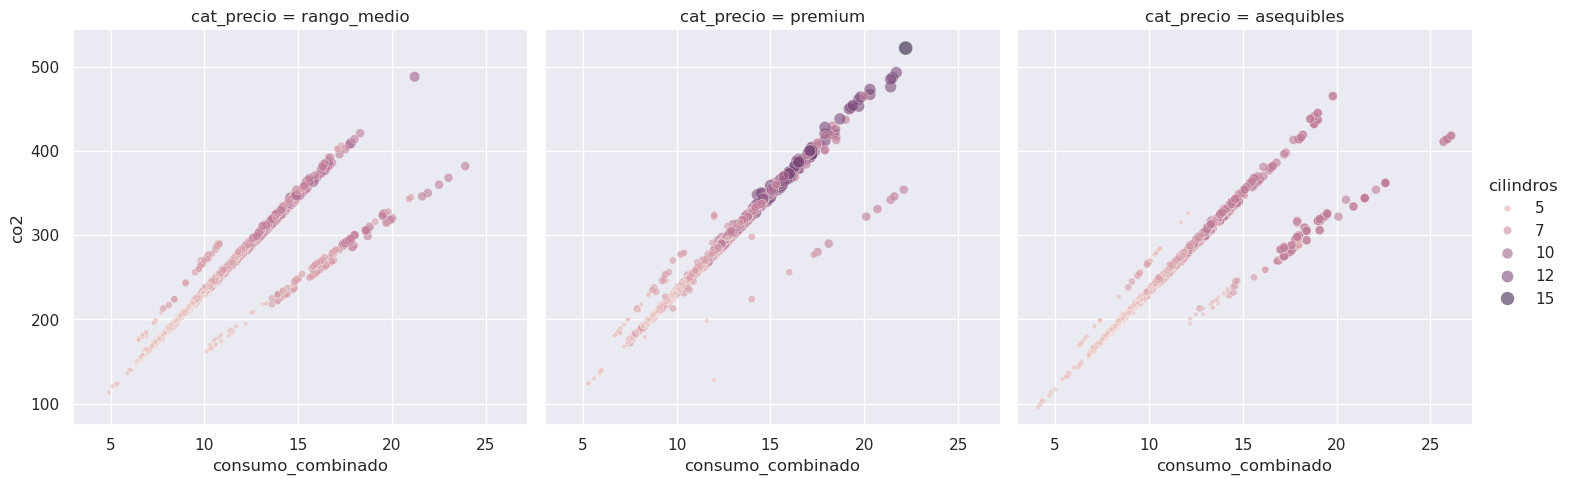

In [309]:
sns.relplot(x='consumo_combinado', y='co2', hue='cilindros', #style='mpg_level',
            size='cilindros', col='cat_precio', data=cars, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

CO2, Consumo_combinado y tipo de combustible

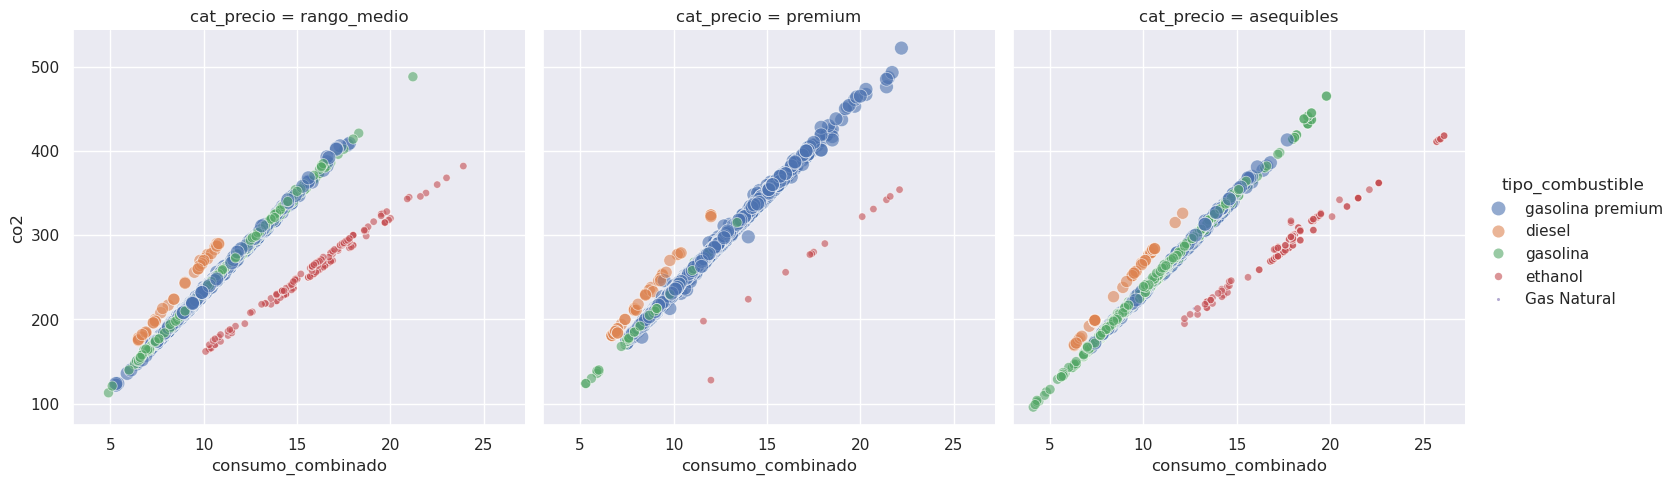

In [310]:
sns.relplot(x='consumo_combinado', y='co2', hue='tipo_combustible', 
            size='tipo_combustible', col='cat_precio', data=cars, kind='scatter', sizes=(5, 100), alpha=0.6)
plt.show()

**Insights**
- Cuantos más cilindros mayor consumo y emisiones de co2
- Como vimos antes el etanol parece ser el combustible que menos co2 emite por litro consumido y que tiene el mayor consumo.